In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OneHotEncoder
from fbprophet import Prophet

In [2]:
df = pd.read_csv('2018_and_on.csv')
df.columns = ['datetime','plaza_id','total_count']
df

,datetime,plaza_id,total_count
0,2020-09-05 00:00:00,Triboro Bronx,2314
1,2020-09-05 01:00:00,Triboro Bronx,1600
2,2020-09-05 02:00:00,Triboro Bronx,1151
3,2020-09-05 03:00:00,Triboro Bronx,983
4,2020-09-05 04:00:00,Triboro Bronx,1111
...,...,...,...
393728,2018-01-01 19:00:00,Verrazano,4668
393729,2018-01-01 20:00:00,Verrazano,4146
393730,2018-01-01 21:00:00,Verrazano,3056
393731,2018-01-01 22:00:00,Verrazano,2918


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,plaza_id,total_count
0,2020-09-05 00:00:00,Triboro Bronx,2314
1,2020-09-05 01:00:00,Triboro Bronx,1600
2,2020-09-05 02:00:00,Triboro Bronx,1151
3,2020-09-05 03:00:00,Triboro Bronx,983
4,2020-09-05 04:00:00,Triboro Bronx,1111
...,...,...,...
393728,2018-01-01 19:00:00,Verrazano,4668
393729,2018-01-01 20:00:00,Verrazano,4146
393730,2018-01-01 21:00:00,Verrazano,3056
393731,2018-01-01 22:00:00,Verrazano,2918


In [4]:
df.set_index('datetime', inplace=True)
df

,plaza_id,total_count
datetime,,
2020-09-05 00:00:00,Triboro Bronx,2314
2020-09-05 01:00:00,Triboro Bronx,1600
2020-09-05 02:00:00,Triboro Bronx,1151
2020-09-05 03:00:00,Triboro Bronx,983
2020-09-05 04:00:00,Triboro Bronx,1111
...,...,...
2018-01-01 19:00:00,Verrazano,4668
2018-01-01 20:00:00,Verrazano,4146
2018-01-01 21:00:00,Verrazano,3056


In [5]:
_df = df.groupby('plaza_id')['total_count'].resample('1D').sum()
_df

plaza_id          datetime  
Brooklyn Battery  2018-01-01     28500
                  2018-01-02     47160
                  2018-01-03     54005
                  2018-01-04     20484
                  2018-01-05     38007
                                 ...  
Whitestone        2020-09-01    120023
                  2020-09-02    121942
                  2020-09-03    129804
                  2020-09-04    142667
                  2020-09-05    132535
Name: total_count, Length: 9790, dtype: int64

In [6]:
_df_unstack = _df.unstack().T

In [7]:
_df_unstack

plaza_id,Brooklyn Battery,Cross Bay,Henry Hudson,Marine Parkway,Quessn Midtown,Throgs Neck,Triboro Bronx,Triboro Manhattan,Verrazano,Whitestone
datetime,,,,,,,,,,
2018-01-01,28500,13226,45681,11729,53427,96408,107518,29590,79469,106796
2018-01-02,47160,21875,60610,19887,67000,106264,129574,35356,95649,117211
2018-01-03,54005,24607,67983,22067,71725,115952,136213,38937,103506,123974
2018-01-04,20484,8303,14502,6167,26625,28406,50867,13270,37820,38114
2018-01-05,38007,16839,49850,13929,55153,80477,105945,29308,74375,91229
...,...,...,...,...,...,...,...,...,...,...
2020-09-01,54205,22050,58137,21816,66451,102514,123835,34637,98659,120023
2020-09-02,53388,21632,61046,21038,66285,100477,121336,34427,99886,121942
2020-09-03,58136,25051,66150,25955,69008,109383,132064,38136,103172,129804


In [8]:
for i in _df_unstack.columns:
    _df_unstack[i] = _df_unstack[i].replace(to_replace=0, method='ffill')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013020188>,
      dtype=object)

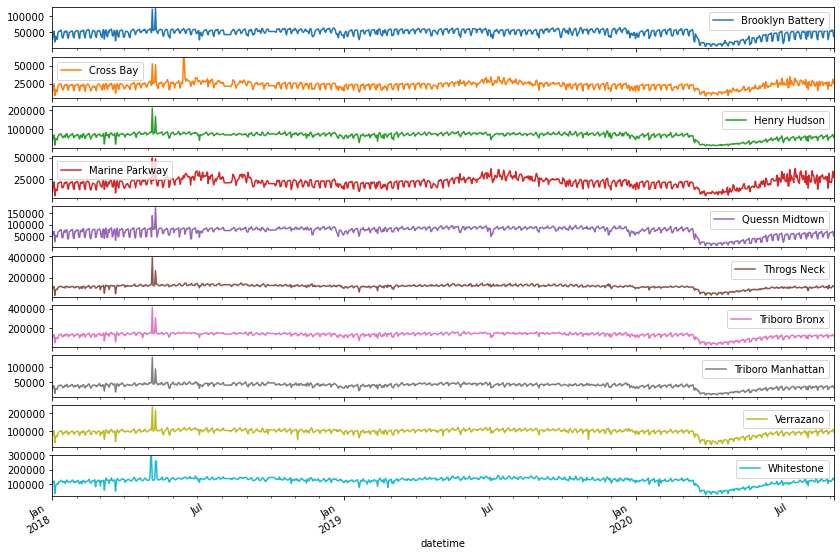

In [9]:
_df_unstack.plot(subplots=True, figsize=(14,10))

In [10]:
_BBT = _df_unstack[['Brooklyn Battery']].copy()

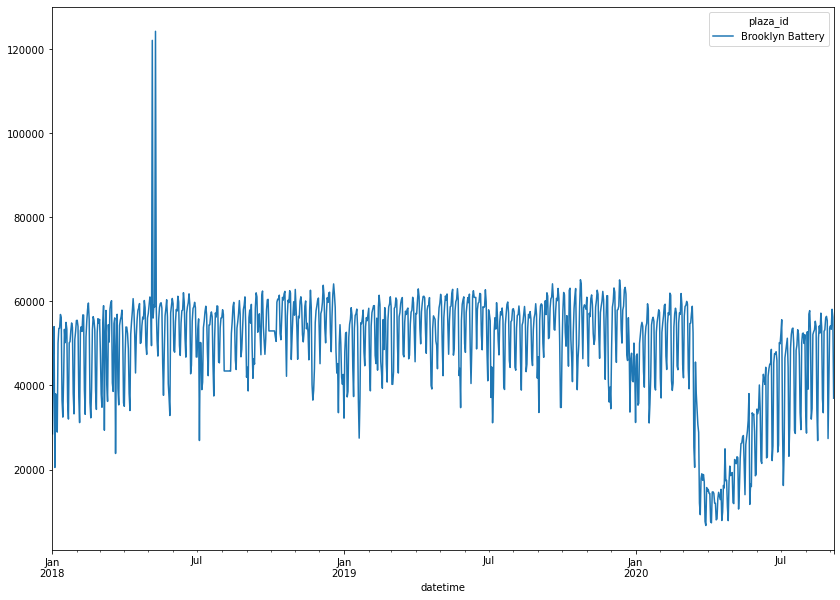

In [11]:
_BBT.plot(figsize=(14,10))

In [14]:
_BBT.reset_index(inplace=True)
_BBT.columns = ['ds', 'y']
_BBT

,ds,y
0,2018-01-01,28500
1,2018-01-02,47160
2,2018-01-03,54005
3,2018-01-04,20484
4,2018-01-05,38007
...,...,...
974,2020-09-01,54205
975,2020-09-02,53388
976,2020-09-03,58136
977,2020-09-04,56280


In [19]:
m = Prophet()
m.fit(_BBT.loc[_BBT['ds'].lt('2020-08-20')])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=17)
future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
974,2020-09-01
975,2020-09-02
976,2020-09-03
977,2020-09-04


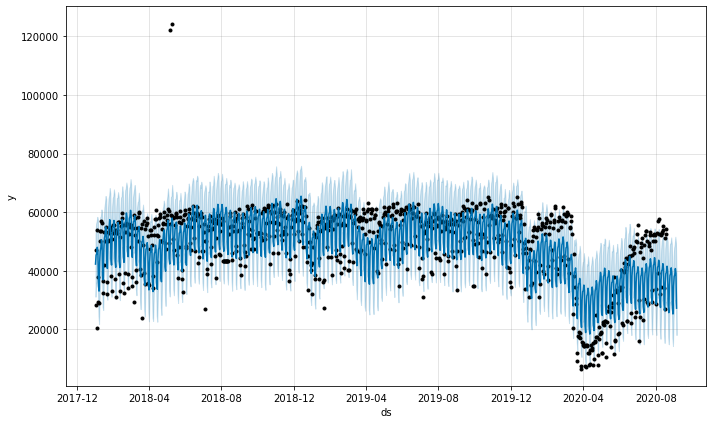

In [22]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

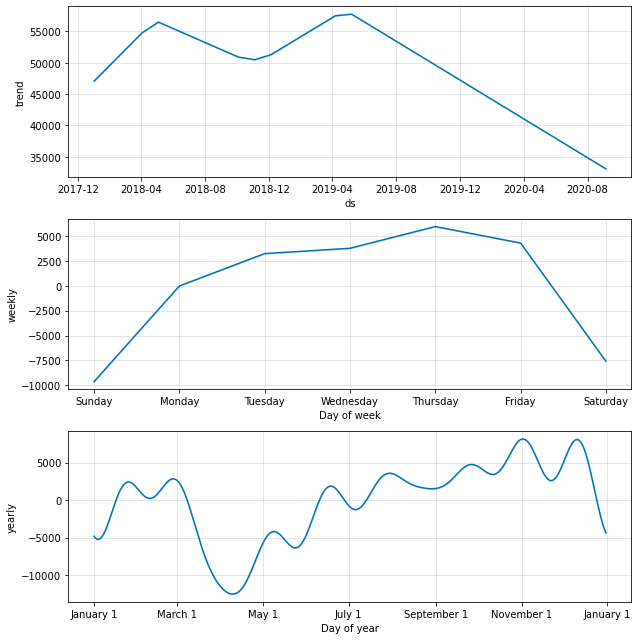

In [23]:
fig2 = m.plot_components(forecast)


In [ ]:
conditions = [
    (_BBT.index >= '2020-03-21') & (_BBT.index < '2020-06-08'),
    (_BBT.index >= '2020-06-08') & (_BBT.index < '2020-06-22'),
    (_BBT.index >= '2020-06-22') & (_BBT.index < '2020-07-06'),
    (_BBT.index >= '2020-07-06') & (_BBT.index < '2020-07-19'),
    (_BBT.index >= '2020-07-19')
]

choices = [
    0,
    1,
    2,
    3,
    4
]

_BBT['Phase'] = np.select(conditions, choices, 5)
_BBT


In [37]:
lockdown = pd.DataFrame({
  'holiday': 'lockdown',
  'ds': pd.date_range(start='2020-03-21', end='2020-06-07'),
  'lower_window': 0,
  'upper_window': 1,
})
phase_1 = pd.DataFrame({
  'holiday': 'Phase_1',
  'ds': pd.date_range(start='2020-06-08', end='2020-06-21'),
  'lower_window': 0,
  'upper_window': 1,
})
phase_2 = pd.DataFrame({
  'holiday': 'Phase_2',
  'ds': pd.date_range(start='2020-06-22', end='2020-07-05'),
  'lower_window': 0,
  'upper_window': 1,
})
phase_3 = pd.DataFrame({
  'holiday': 'Phase_3',
  'ds': pd.date_range(start='2020-07-06', end='2020-07-18'),
  'lower_window': 0,
  'upper_window': 1,
})
phase_4 = pd.DataFrame({
  'holiday': 'Phase_4',
  'ds': pd.date_range(start='2020-07-19', end='2020-11-04'),
  'lower_window': 0,
  'upper_window': 1,
})


holidays = pd.concat((lockdown, phase_1, phase_2, phase_3, phase_4))
holidays

,holiday,ds,lower_window,upper_window
0,lockdown,2020-03-21,0,1
1,lockdown,2020-03-22,0,1
2,lockdown,2020-03-23,0,1
3,lockdown,2020-03-24,0,1
4,lockdown,2020-03-25,0,1
...,...,...,...,...
104,Phase_4,2020-10-31,0,1
105,Phase_4,2020-11-01,0,1
106,Phase_4,2020-11-02,0,1
107,Phase_4,2020-11-03,0,1


In [38]:
m = Prophet(holidays=holidays)
m.fit(_BBT)
future = m.make_future_dataframe(periods=60)
future

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1034,2020-10-31
1035,2020-11-01
1036,2020-11-02
1037,2020-11-03


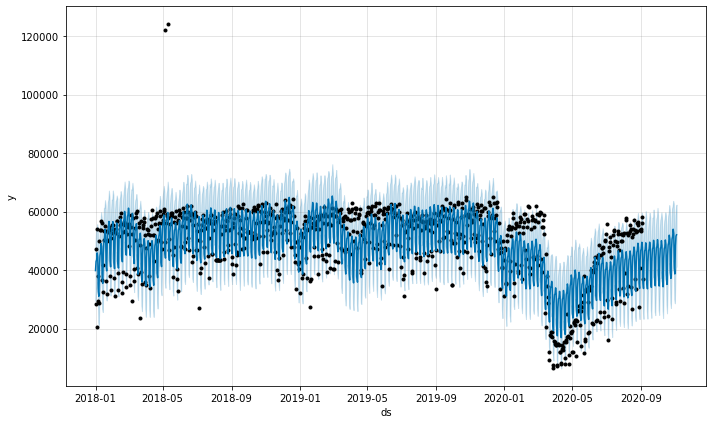

In [39]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [40]:
m = Prophet(holidays=holidays,
           changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.1,
                      n_changepoints = 200,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
m.fit(_BBT)
future = m.make_future_dataframe(periods=60)
future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1034,2020-10-31
1035,2020-11-01
1036,2020-11-02
1037,2020-11-03


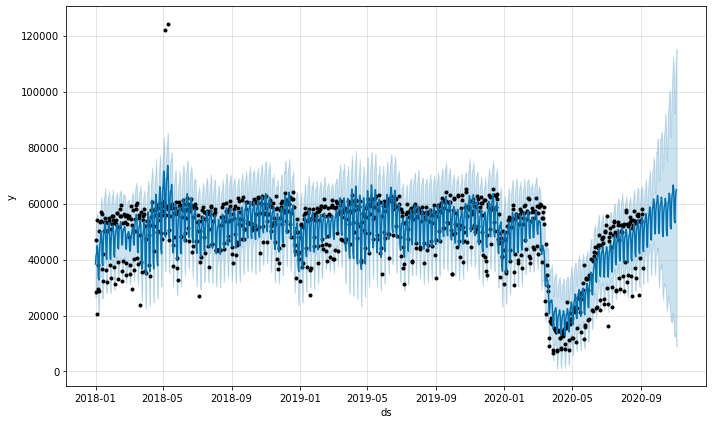

In [41]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [42]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [46]:
holidays

,holiday,ds,lower_window,upper_window
0,lockdown,2020-03-21,0,1
1,lockdown,2020-03-22,0,1
2,lockdown,2020-03-23,0,1
3,lockdown,2020-03-24,0,1
4,lockdown,2020-03-25,0,1
...,...,...,...,...
104,Phase_4,2020-10-31,0,1
105,Phase_4,2020-11-01,0,1
106,Phase_4,2020-11-02,0,1
107,Phase_4,2020-11-03,0,1


In [48]:
_BBT

,ds,y
0,2018-01-01,28500
1,2018-01-02,47160
2,2018-01-03,54005
3,2018-01-04,20484
4,2018-01-05,38007
...,...,...
974,2020-09-01,54205
975,2020-09-02,53388
976,2020-09-03,58136
977,2020-09-04,56280


In [54]:
end_date = '2020-8-20'
mask1 = (_BBT['ds'] <= end_date)
mask2 = (_BBT['ds'] > end_date)

X_tr = _BBT.loc[mask1]
X_tst = _BBT.loc[mask2]
print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

train shape (963, 2)
test shape (16, 2)


In [65]:
X_tr

,ds,y
0,2018-01-01,28500
1,2018-01-02,47160
2,2018-01-03,54005
3,2018-01-04,20484
4,2018-01-05,38007
...,...,...
958,2020-08-16,26879
959,2020-08-17,51279
960,2020-08-18,54168
961,2020-08-19,52481


In [57]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [68]:
strt='2020-08-20'
end='2020-09-05'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    np.random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holidays, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=16, freq='D',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = _BBT[(_BBT['ds']>strt) & (_BBT['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 12.113778109784112
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 9.594169050263975
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 11.96910597208237
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 9.75994167150792
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MA

In [69]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,9.594169,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,9.594169,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,9.594169,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
3,9.594169,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
4,9.594169,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."


In [70]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.1,
 'holidays_prior_scale': 0.1,
 'n_changepoints': 100,
 'seasonality_mode': 'additive'}

In [71]:
m = Prophet(holidays=holidays,
           changepoint_prior_scale= 0.1,
                      holidays_prior_scale = 0.1,
                      n_changepoints = 100,
                      seasonality_mode = 'additive',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
m.fit(_BBT)
future = m.make_future_dataframe(periods=60)
future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1034,2020-10-31
1035,2020-11-01
1036,2020-11-02
1037,2020-11-03


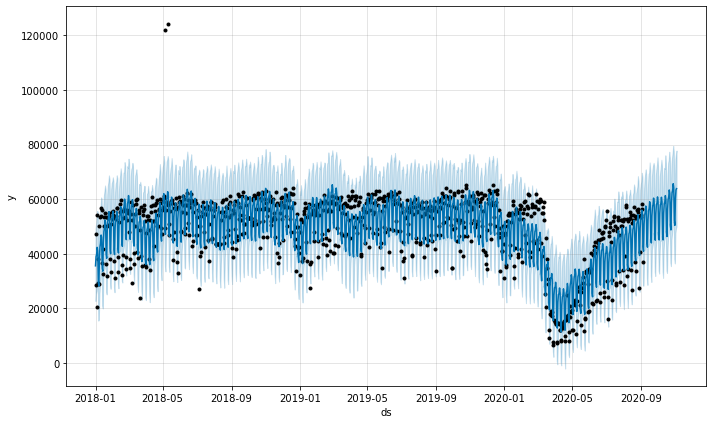

In [72]:
forecast = m.predict(future)
fig1 = m.plot(forecast)